<div style="text-align: center;"> <h3>Data Mining and Wrangling</h3>
<h5>Formative Assessment 5</h5>
<h5>Arpil 30, 2025</h5>    
<h5><u>By Romand Lansangan</u></h5>
    </div>
    
---

## Case study: Titanic Dataset

### Introduction
**Objective**: The objective of this report is to implement logistic regression in predicting the survival of each person in the Titanic dataset. By the end, this report ought to analyze the model created, feature importance, and some limitations to the logistic regression model.

**Dataset**:
For this report, we shall use the titanic dataset whyich contains key information to each passenger and their survival status. The dateset will be downloaded from seaborn.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
df =  sns.load_dataset("titanic")
print("Shape:", f"{df.shape[0]} X {df.shape[1]}")
df.head()

Shape: 891 X 15


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
df.loc[:,df.nunique() < 10].apply(lambda x: x.unique(), axis=0).reset_index().rename({0: "unique_values"}, axis=1)

,index,unique_values
0,survived,"[0, 1]"
1,pclass,"[3, 1, 2]"
2,sex,"[male, female]"
3,sibsp,"[1, 0, 3, 4, 2, 5, 8]"
4,parch,"[0, 1, 2, 5, 3, 4, 6]"
5,embarked,"[S, C, Q, nan]"
6,class,"['Third', 'First', 'Second'] Categories (3, ob..."
7,who,"[man, woman, child]"
8,adult_male,"[True, False]"
9,deck,"[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F'] Categ..."



The dataset includes the following key features:

*   `survived`: Binary indicator of survival (0 or 1).
*   `pclass`: Passenger class (1st, 2nd, or 3rd).
*   `sex`: Passenger sex (male or female).
*   `sibsp`: Number of siblings/spouses aboard.
*   `parch`: Number of parents/children aboard.
*   `embarked`: Port of embarkation (S, C, Q).
*   `class`: Categorical class ('Third', 'First', 'Second').
*   `who`: Person type (man, woman, child).
*   `adult_male`: Boolean indicating if the person is an adult male.
*   `deck`: Cabin deck level (A, B, C, D, E, F, G).
*   `embark_town`: Town of embarkation (Southampton, Cherbourg, Queenstown).
*   `alive`: Binary indicator of being alive (no or yes).
*   `alone`: Boolean indicating if the person is alone.


Some of these are unnecessary. Like for example, the `alive` is redundant considering `survived` already exist. We will deal with them later.

### Split

To prevent data leakage, let us split the data first into training and testing batches.

In [5]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

print("Shape of df_train:", df_train.shape)
print("Shape of df_test:", df_test.shape)

Shape of df_train: (712, 15)
Shape of df_test: (179, 15)


### EDA

#### Cardinality

In [6]:
df_train.nunique()

survived         2
pclass           3
sex              2
age             83
sibsp            7
parch            7
fare           220
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

As we can see, most of these are categorical data. `fare` and `age` are the only continous variables.

In [7]:
df_train.embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [8]:
df_train.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

`embark_town` is redundant.

In [9]:
del df_train['embarked']

In [10]:
df_train.alive.unique()

array(['no', 'yes'], dtype=object)

In [11]:
df_train.survived.unique()

array([0, 1], dtype=int64)

In [12]:
mask = ((df_train['alive'] == 'no') & (df_train['survived'] == 0)) | ((df_train['alive'] == 'yes') & (df_train['survived'] == 1))
len(df_train) - mask.sum()

0

`alive` and `survive` are exactly the same.

In [13]:
del df_train['alive']

#### Missing Data

In [14]:
df_train.isna().sum() * 100 / len(df_train)

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.662921
sibsp           0.000000
parch           0.000000
fare            0.000000
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.808989
embark_town     0.280899
alone           0.000000
dtype: float64

For the missing values in `age` usually we can just impute the average age (but we will not do that).

For the missing values in `embark_town`, we can impute the majority class.

For the `deck` however, this much more complicated.

In [15]:
df_train.deck.unique()

['C', NaN, 'B', 'F', 'D', 'E', 'A', 'G']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [16]:
df_train_copy = df_train.copy()

df_train_copy['deck'] = df_train_copy['deck'].astype("object").fillna("None")

In [17]:
df_train_copy.groupby(["deck", 'pclass']).count()['sex']

deck  pclass
A     1          10
B     1          38
C     1          52
D     1          17
      2           2
E     1          18
      2           3
      3           3
F     2           7
      3           5
G     3           3
None  1          28
      2         139
      3         387
Name: sex, dtype: int64

Maybe the missing values are the people who are not assigned any particular deck or cabin.

We can make it into it's own category.

For `deck` let's create new category called "None"

In [18]:
df_train['deck'] = df_train['deck'].astype("object").fillna("None")

For `embark_town`, we could just impute the majority class.

In [19]:
majority_class = df_train['embark_town'].value_counts(ascending=False).index[0]
df_train['embark_town'] = df_train['embark_town'].fillna(majority_class)

Age is a bit complicated. Usually, we can just fill the missing values with the mean. However, this will increase the kurtosis to a significant degree. We don't want that. So I'm thinking of creating a random normal distribution with the mean and std of the `Age` as its parameter. First off, let's look at the distribution of `Age`. 

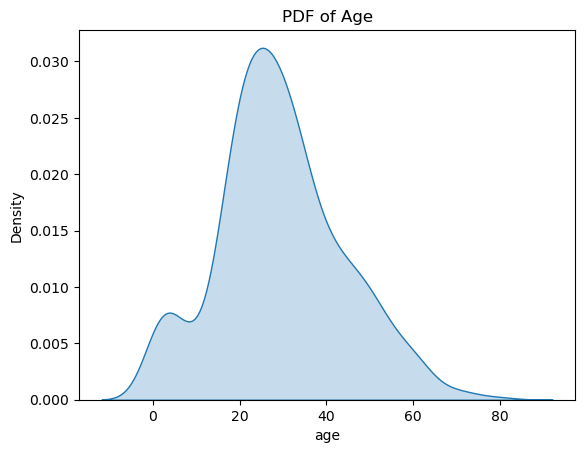

In [20]:
sns.kdeplot(df_train['age'], fill=True)
plt.title("PDF of Age");

Age is normally distributed which means, we can proceed with our random normal distribution imputation.

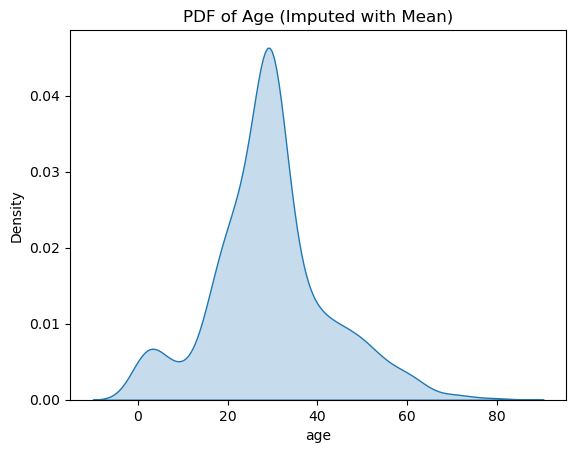

In [21]:
mean_age = df_train['age'].mean()
mean_imputed = df_train['age'].fillna(mean_age)
sns.kdeplot(mean_imputed, fill=True)
plt.title("PDF of Age (Imputed with Mean)");

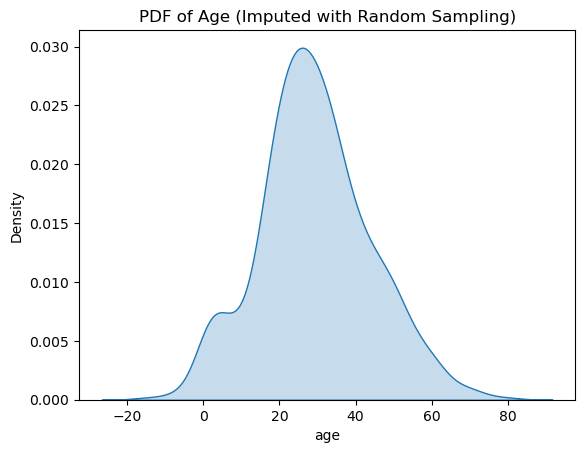

In [22]:
mask = df_train['age'].isna()
na_index = df_train.loc[mask, 'age'].index

random_age = np.random.normal(mean_age, df_train['age'].std(), len(na_index))
df_train.loc[na_index, 'age'] = random_age

sns.kdeplot(df_train['age'], fill=True)
plt.title("PDF of Age (Imputed with Random Sampling)");

In [23]:
df_train.isna().sum() * 100 / len(df_train)

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
class          0.0
who            0.0
adult_male     0.0
deck           0.0
embark_town    0.0
alone          0.0
dtype: float64

### Distribution

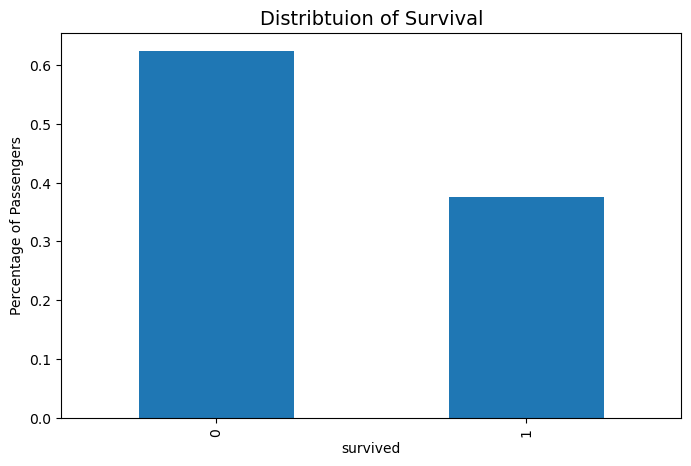

In [74]:
plt.figure(figsize=(8,5))
df_train['survived'].value_counts(normalize=True).plot(kind="bar")

plt.title("Distribtuion of Survival", size=14)
plt.ylabel("Percentage of Passengers");

There's a class imbalance between the two classes but it's moderate and doesn't call for any strict resampling.

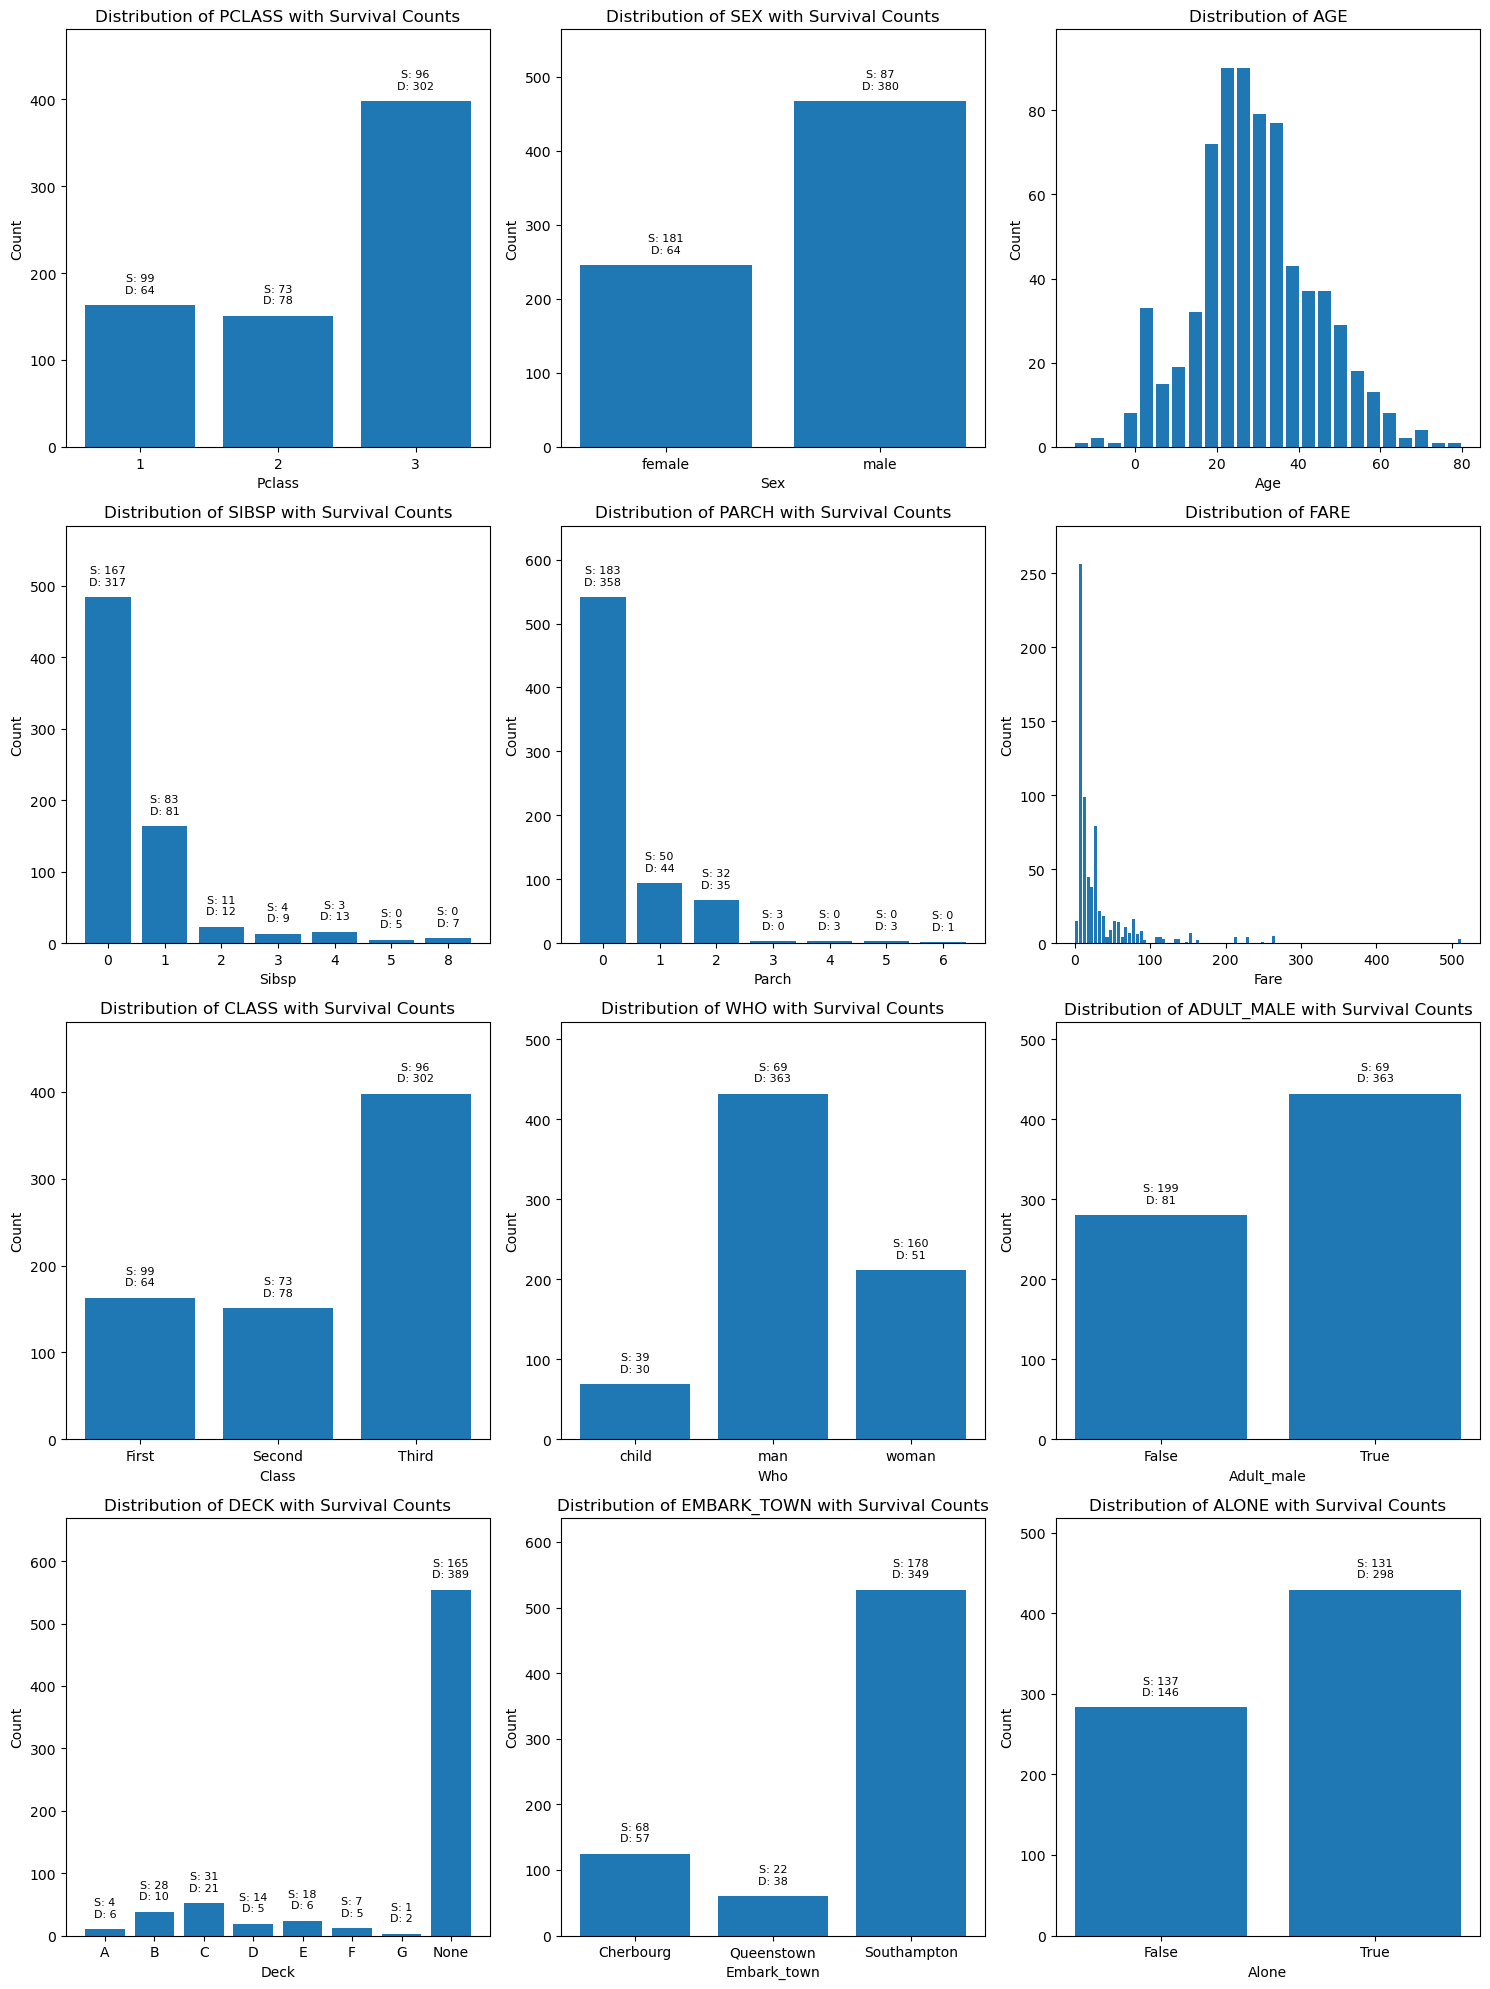

In [24]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

cols_to_plot = [col for col in df_train.columns.to_list() if col != 'survived']

rows = int(np.ceil(len(cols_to_plot) / 3))

if rows == 0:
    print("No columns found in df_train to plot other than 'survived'.")
    exit() 

fig, axes = plt.subplots(ncols=3, nrows=rows, figsize=(15, 5*rows))

if axes.ndim == 0: 
    axes = np.array([axes])
elif axes.ndim == 1:
    pass 
else: 
    axes = axes.flatten()


cols_to_plot = cols_to_plot[:len(axes)]

for ind, col in enumerate(cols_to_plot):
    ax = axes[ind]

    is_discrete = df_train[col].nunique() <= 10 or pd.api.types.is_categorical_dtype(df_train[col]) or pd.api.types.is_bool_dtype(df_train[col])

    if is_discrete:
        counts = df_train.groupby([col, 'survived'], dropna=False).size().unstack(fill_value=0)
        total_counts = counts.sum(axis=1)

        if total_counts.empty:
             print(f"Column '{col}' has no data to plot.")
             ax.set_title(f"No data for {col.upper()}")
             ax.set_xlabel(col.capitalize())
             ax.set_ylabel("Count")
             continue


        x_values = counts.index

        bars = ax.bar(x_values.astype(str), total_counts.values)
        ax.set_xticks(x_values.astype(str)) 

        max_height = total_counts.max()
        offset = max_height * 0.03 

        for bar, (x_val, total), (died, survived) in zip(bars, total_counts.items(), counts.values):
             bar_x_pos = bar.get_x() + bar.get_width() / 2
             text = f"S: {survived}\nD: {died}"
             ax.text(bar_x_pos, total + offset, text, ha='center', va='bottom', fontsize=8)

    else:
        data_to_bin = df_train[col].dropna()
        if data_to_bin.empty:
             print(f"Column '{col}' has no non-NaN values to plot.")
             ax.set_title(f"No data for {col.upper()}")
             ax.set_xlabel(col.capitalize())
             ax.set_ylabel("Count")
             continue 

        _, edges = np.histogram(data_to_bin, bins='auto') 

        df_temp = df_train[[col, 'survived']].dropna() 
        if df_temp.empty: 
             print(f"Column '{col}' has no data with corresponding 'survived' status.")
             ax.set_title(f"No data for {col.upper()}")
             ax.set_xlabel(col.capitalize())
             ax.set_ylabel("Count")
             continue

        df_temp['temp_bin'] = pd.cut(df_temp[col], bins=edges, include_lowest=True)

        bin_counts = df_temp.groupby(['temp_bin', 'survived'], observed=False).size().unstack(fill_value=0)

        bin_counts['total'] = bin_counts.sum(axis=1)

        bin_intervals = bin_counts.index
        bin_centers = np.array([(interval.left + interval.right) / 2 for interval in bin_intervals])

        bar_width = np.mean(np.diff(edges)) * 0.8 if len(edges) > 1 else 1 # Use 80% of bin width

        ax.bar(bin_centers, bin_counts['total'], width=bar_width)



    ax.set_title(f"Distribution of {col.upper()}" + (" with Survival Counts" if is_discrete else "")) 
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel("Count")

    ax.set_ylim(0, ax.get_ylim()[1] * (1.15 if is_discrete else 1.05))

for i in range(len(cols_to_plot), len(axes)):
    fig.delaxes(axes[i])


plt.tight_layout() 
plt.show()

#### Class
For `class`, there is an inherent order in the categories. Usually, we will map it in ordinal approach with the highes as the first class. But since there are enough sample space for each separate classes, we can use one hot encoded here. I think it would be a better approach because using ordinal mappint will mean that there is a linear relationship between `class` and `survival`. Using one hot encoding will give the model an opportunity to capture non-linear relationship.

#### Deck
There is a clear imbalance of data in the `deck` coloumn. Around 77.8% of people doesn't have one. This might become a problem since the remain 22.2% are also distributed around the A-G deck. We won't be getting enough representation for each deck to pose a significant coefficient to the dependent variable. Instead, we can use create a new feature, `has_deck` which is a binary feature that group all thos who have deck together. Of course, this will still be an imbalance distribtion but not to extent of what we have right now. 

####  Sibsp and Parch
`sibsp` and `parch` have very simillar distribution. Imbalanced data with bunch of rarities. We can group the rarer groups together to atleest make sense of them. 

For `parch`:
* `parch_0`
* `parch_1`
* `parch_2`
* `parch_3orMore`

For `sibsp`:
* `sibsp_0`
* `sibsp_1`
* `sibsp_2orMore`

#### Fare and Age
For continous variable, it might be safer to standardize them first.

Also, it might be good to drop the significant outlier in `fare`.

#### Others
For others, standard procedure will be done.


In [49]:
def wrangle(data):
    # remove outlier
    mask = data['fare'] < 400

    df = data[mask].copy()

    # for class
    classes = pd.get_dummies(df['class'], dtype=int, prefix="class")
    
    # for deck
    has_deck = (df['deck'] != "None").astype(int).rename("has_deck")

    # for sibsp
    sibsp_cats = df['sibsp'].apply(lambda x: x if x in [0, 1] else 2)
    sibsp = pd.get_dummies(sibsp_cats, dtype=int,  prefix="sibsp")

    # for parch
    parch_cats = df['parch'].apply(lambda x: x if x in [0, 1, 2] else 3)
    parch = pd.get_dummies(parch_cats, dtype=int,  prefix="parch")

    # for embark_town
    embark_town = pd.get_dummies(df['embark_town'], dtype=int)

    who = pd.get_dummies(df['who'], dtype=int, prefix="is")
    
    mean_age, std_age = df['age'].mean(), df['age'].std()
    age_scaled = (df['age'] - mean_age) / std_age

    mean_fare, std_fare = df['fare'].mean(), df['fare'].std()
    fare_scaled = (df['fare'] - mean_fare) / std_fare

    is_male = (df['sex'] == "male").rename("is_male")

    cols_delete = ['parch', 'class', 'sibsp', 'deck', 'embark_town', 'sex', 'who', 'pclass', 'adult_male', 'age', 'fare']
    cols_delete.extend(cols_delete)

    df.drop(columns=cols_delete, inplace=True)

    df_final = pd.concat([df, classes, has_deck, sibsp, parch, embark_town, who, age_scaled, fare_scaled, is_male], axis=1)

    df_final.rename({"sibsp_2" : "sibsp_2OrMore", "parch_3": "parch_3OrMore"}, axis=1, inplace=True)

    return df_final

In [50]:
df_train_wrangled = wrangle(df_train)

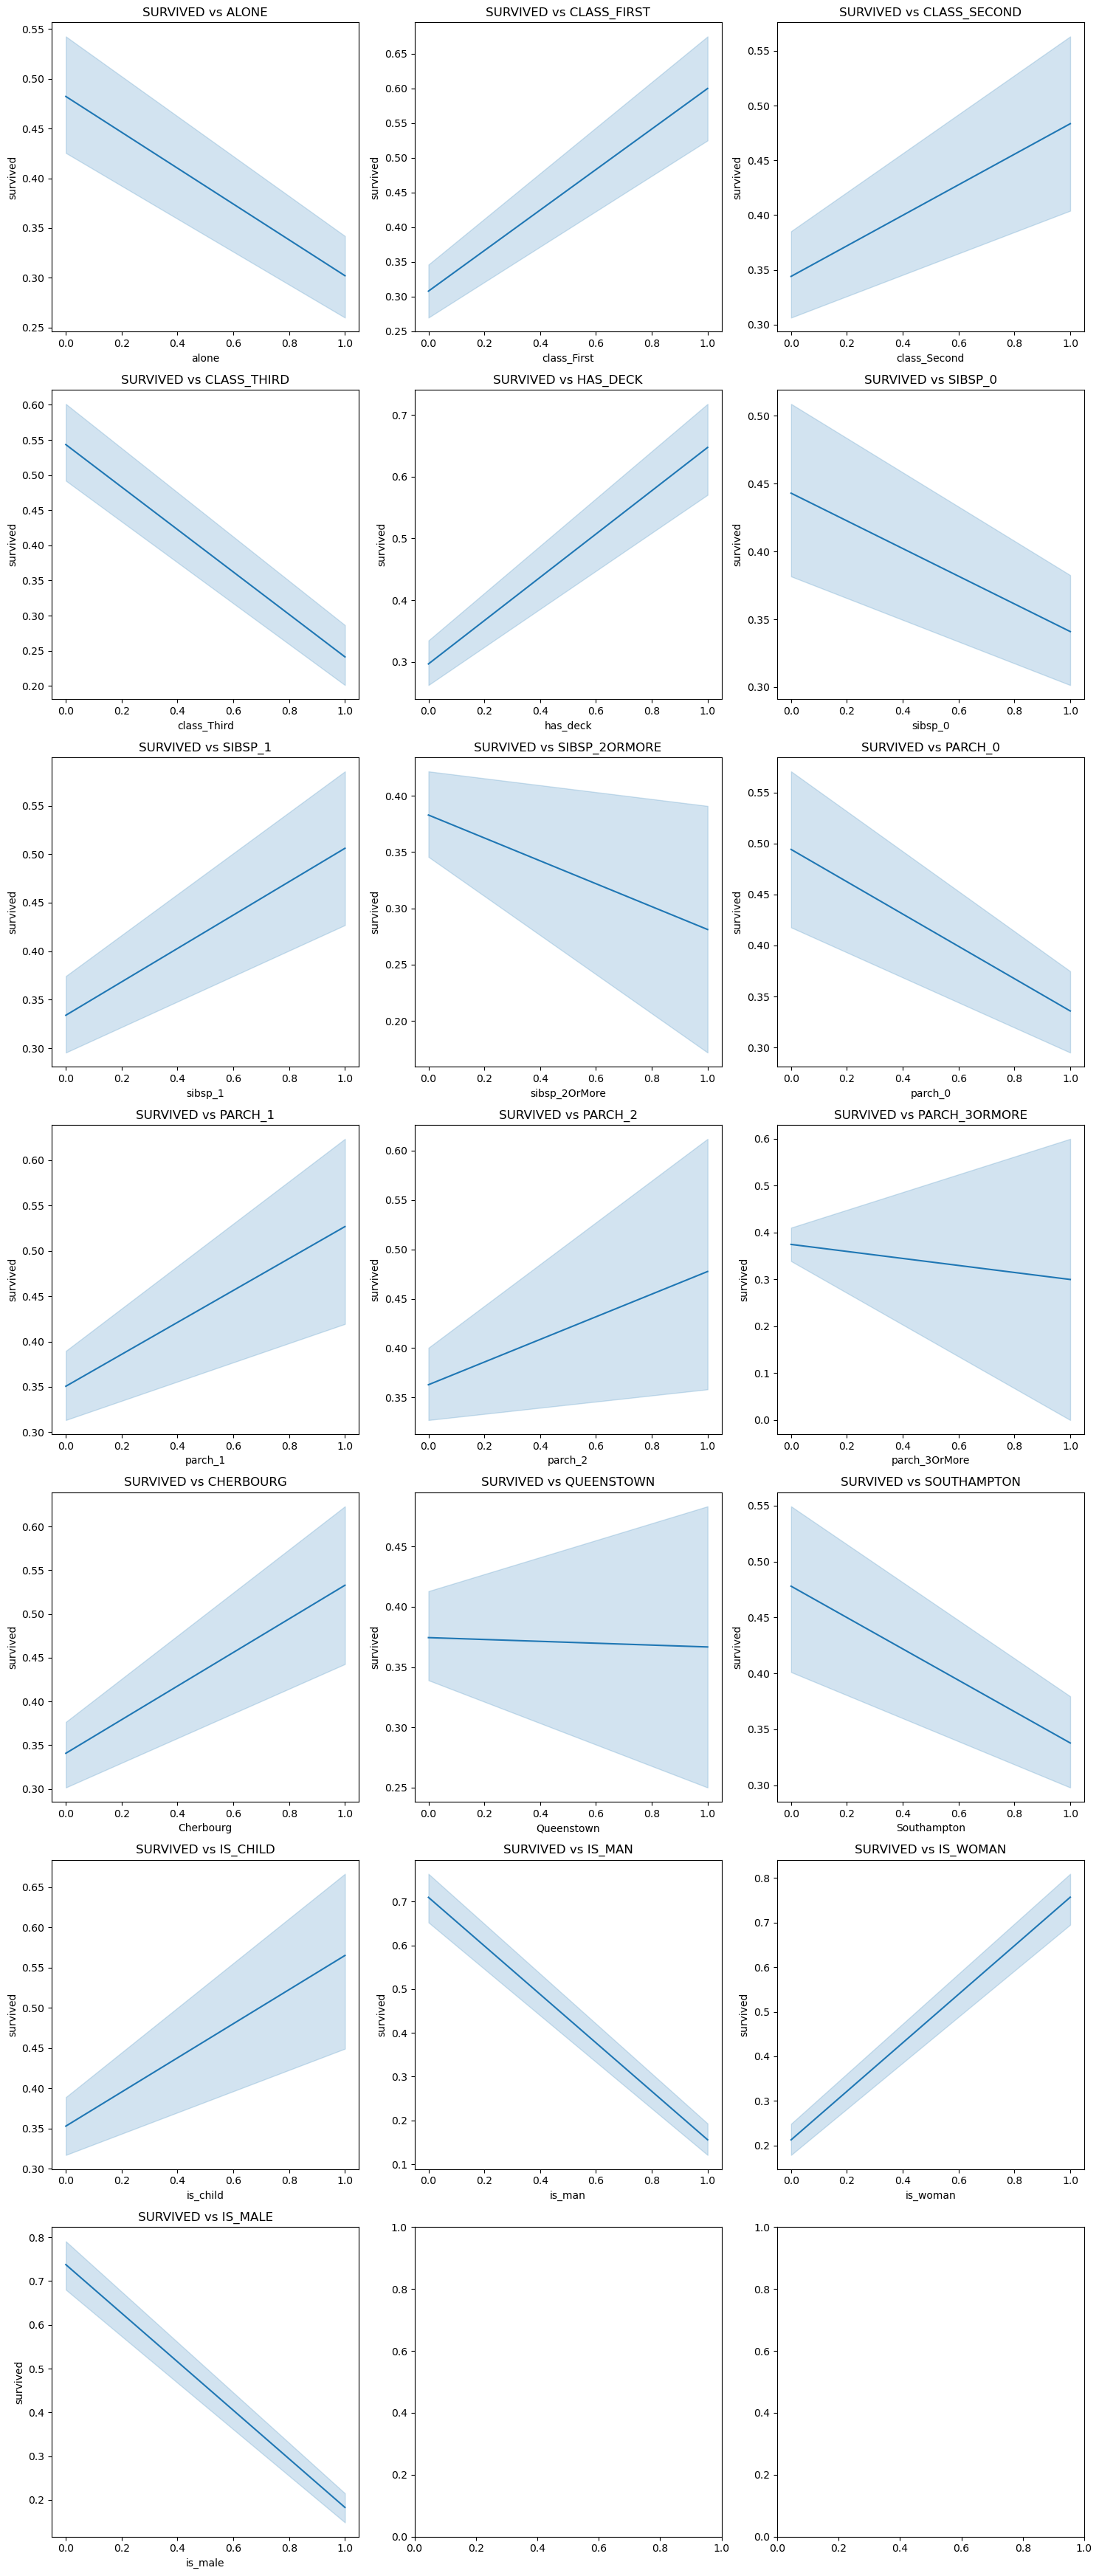

In [51]:
cont = ['age', 'fare']

cols = df_train_wrangled.drop(columns=["survived", 'age', 'fare']).columns

rows = int(np.ceil(len(cols)/3))

fig, ax = plt.subplots(ncols=3, nrows=rows, figsize=(15, 5*rows))
ax = ax.flatten()

for ind, col in enumerate(cols):
    sns.lineplot(
        data=df_train_wrangled,
        x=col,
        y="survived",
        ax=ax[ind]
    )

    ax[ind].set_title(f"SURVIVED vs {col.upper()}")
    
plt.tight_layout()

Look at those linearities! That's beatifully done!

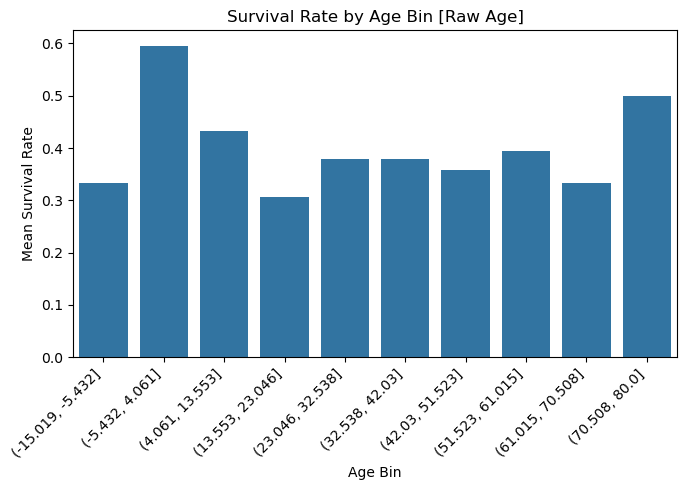

In [28]:
X_copy = df_train.copy()
X_copy['bin'] = pd.cut(df_train['age'], bins=10)

survival_by_age_bin = X_copy.groupby("bin", observed=False)['survived'].mean().reset_index()
survival_by_age_bin_ordered = survival_by_age_bin.sort_values(by='bin')

plt.figure(figsize=(7, 5))

sns.barplot(
    data=survival_by_age_bin_ordered,
    x='bin',      
    y='survived' 
)

plt.title('Survival Rate by Age Bin [Raw Age]')
plt.xlabel('Age Bin')
plt.ylabel('Mean Survival Rate')
plt.xticks(ha='right', rotation=45)
plt.tight_layout()
plt.show()

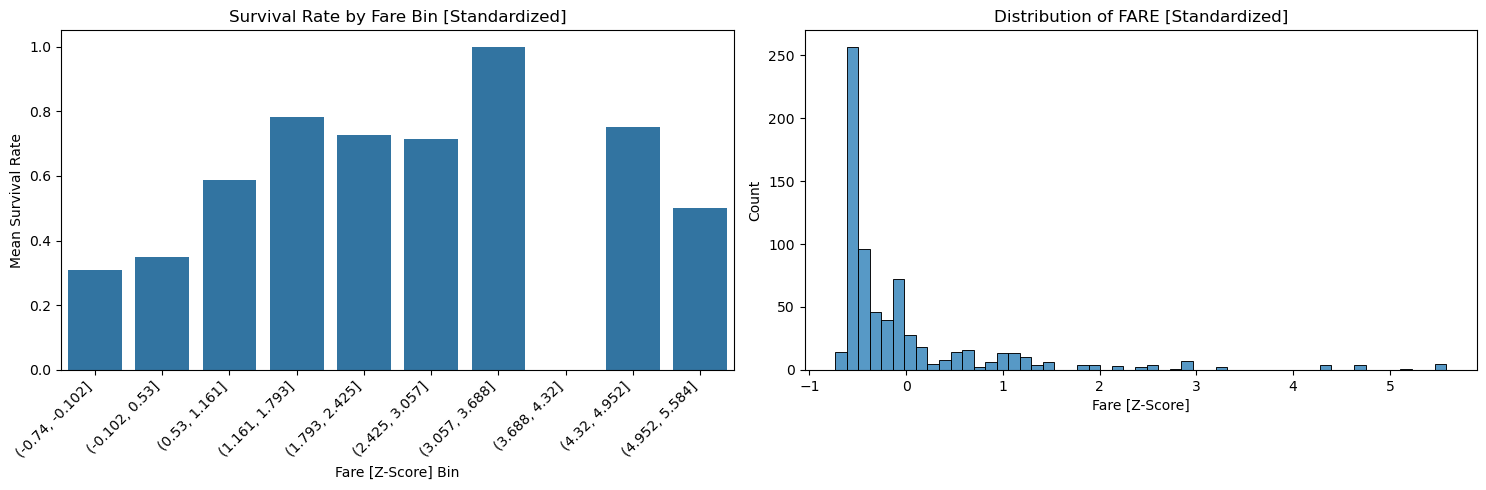

In [29]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))

X_copy = df_train_wrangled.copy()
X_copy['bin'] = pd.cut(df_train_wrangled['fare'], bins=10)

survival_by_age_bin = X_copy.groupby("bin", observed=False)['survived'].mean().reset_index()
survival_by_age_bin_ordered = survival_by_age_bin.sort_values(by='bin')

sns.barplot(
    data=survival_by_age_bin_ordered,
    x='bin',      
    y='survived', 
    ax=ax[0]
)

ax[0].set_title('Survival Rate by Fare Bin [Standardized]')
ax[0].set_xlabel('Fare [Z-Score] Bin')
ax[0].set_ylabel('Mean Survival Rate')
ax[0].tick_params(axis='x', labelrotation=45)

plt.setp(ax[0].get_xticklabels(), ha='right')



sns.histplot(
    df_train_wrangled['fare'],
    ax=ax[1]
)

ax[1].set_title('Distribution of FARE [Standardized]') 
ax[1].set_xlabel('Fare [Z-Score]')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()




From the `Survival Rate by Fare Bin [Standardized]`, the relationship between `fare` and  `survived` become more apparent. So let us also add to wrangle function a bin for fare.

### Correlation

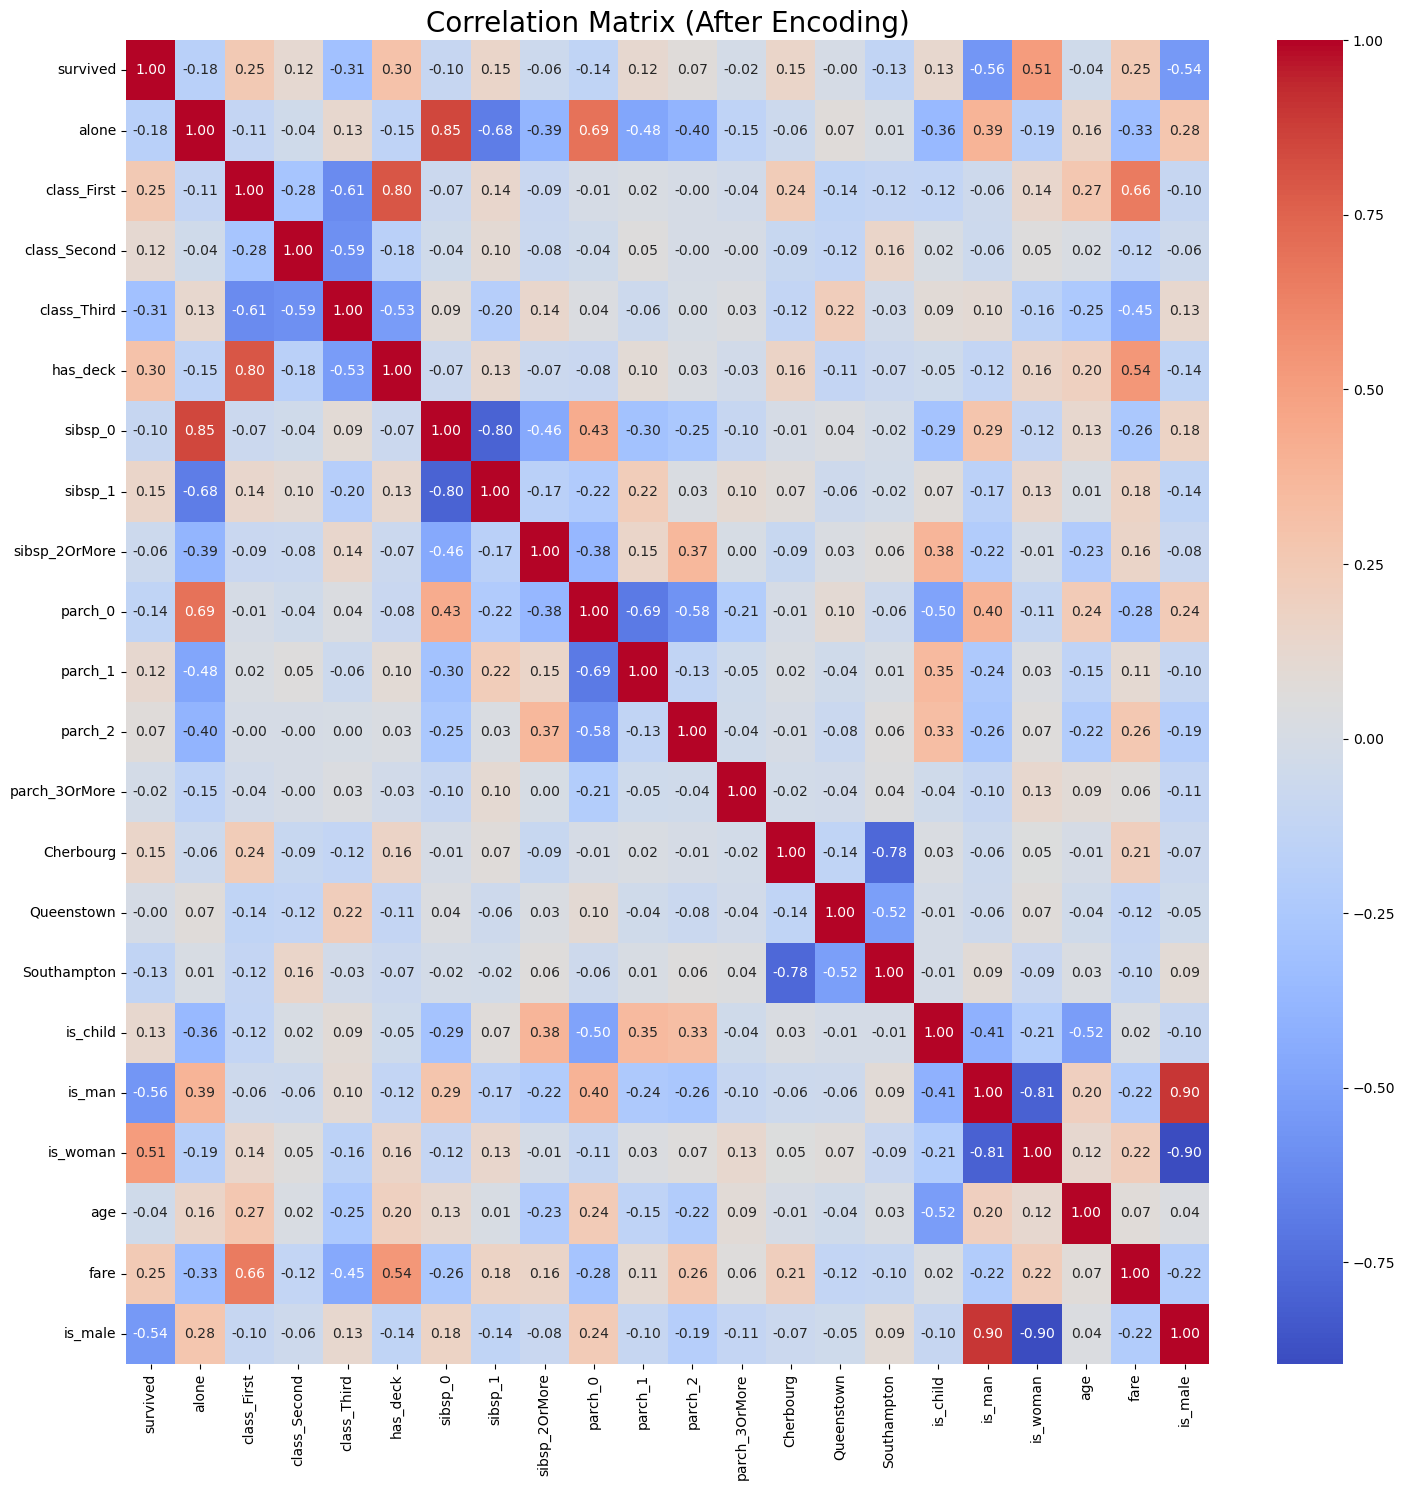

In [52]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_train_wrangled.corr(), annot=True, fmt=".2f", cmap="coolwarm")

plt.title("Correlation Matrix (After Encoding)", size=20)
plt.tight_layout()
plt.show();

`alone` is highly correlated to many features. `is_male` is also correlated to `is_man`. Aside from those, everything's good.

In [53]:
def wrangle(train, test=None):
    test_mode = str(type(test)) != "<class 'NoneType'>"
    if test_mode:
        bin_fare_train, fare_bins_edges = pd.cut(train['fare'], bins=10, retbins=True)
        train_fare_dummies = pd.get_dummies(bin_fare_train, prefix="fare", dtype=int)
        bin_fare_test = pd.cut(test['fare'], bins=fare_bins_edges, include_lowest=True)
        test_fare_dummies = pd.get_dummies(bin_fare_test, prefix="fare", dtype=int)
        fare, _ = test_fare_dummies.align(
            train_fare_dummies, 
            join='right',     
            axis=1,
            fill_value=0 
        )
        # print(fare)
        data = test
    else:
        bin_fare_train, fare_bins_edges = pd.cut(train['fare'], bins=10, retbins=True)
        fare = pd.get_dummies(bin_fare_train, prefix="fare", dtype=int)

        data = train

    # remove outlier
    mask = data['fare'] < 400

    df = data[mask].copy()

    # Imputations
    df['deck'] = df['deck'].astype("object").fillna("None")

    majority_class = df['embark_town'].value_counts(ascending=False).index[0]
    df['embark_town'] = df['embark_town'].fillna(majority_class)

    mask = df['age'].isna()
    na_index = df.loc[mask, 'age'].index

    random_age = np.random.normal(df['age'].mean(), df['age'].std(), len(na_index))
    df.loc[na_index, 'age'] = random_age

    # for class
    classes = pd.get_dummies(df['class'], dtype=int, prefix="class")
    
    # for deck
    has_deck = (df['deck'] != "None").astype(int).rename("has_deck")

    # for sibsp
    sibsp_cats = df['sibsp'].apply(lambda x: x if x in [0, 1] else 2)
    sibsp = pd.get_dummies(sibsp_cats, dtype=int,  prefix="sibsp")

    # for parch
    parch_cats = df['parch'].apply(lambda x: x if x in [0, 1, 2] else 3)
    parch = pd.get_dummies(parch_cats, dtype=int,  prefix="parch")

    # for embark_town
    embark_town = pd.get_dummies(df['embark_town'], dtype=int)

    who = pd.get_dummies(df['who'], dtype=int, prefix="is")
    
    mean_age, std_age = df['age'].mean(), df['age'].std()
    age_scaled = (df['age'] - mean_age) / std_age
        

    cols_delete = ['parch', 'class', 'sibsp', 'deck', 'embark_town', 'sex', 'who', 'pclass', 'adult_male', 'age', 'fare', 'alone', 'embarked', 'alive']
    cols_delete.extend(cols_delete)

    df.drop(columns=cols_delete, inplace=True, errors="ignore")

    df_final = pd.concat([df, classes, has_deck, sibsp, parch, embark_town, who, age_scaled, fare], axis=1)

    df_final.rename({"sibsp_2" : "sibsp_2OrMore", "parch_3": "parch_3OrMore"}, axis=1, inplace=True)

    return df_final.dropna()

In [54]:
df_train_clean = wrangle(df_train)

print(df_train_clean.shape)

(709, 29)


In [55]:
df_train_clean.isna().sum()

survived                   0
class_First                0
class_Second               0
class_Third                0
has_deck                   0
sibsp_0                    0
sibsp_1                    0
sibsp_2OrMore              0
parch_0                    0
parch_1                    0
parch_2                    0
parch_3OrMore              0
Cherbourg                  0
Queenstown                 0
Southampton                0
is_child                   0
is_man                     0
is_woman                   0
age                        0
fare_(-0.512, 51.233]      0
fare_(51.233, 102.466]     0
fare_(102.466, 153.699]    0
fare_(153.699, 204.932]    0
fare_(204.932, 256.165]    0
fare_(256.165, 307.398]    0
fare_(307.398, 358.63]     0
fare_(358.63, 409.863]     0
fare_(409.863, 461.096]    0
fare_(461.096, 512.329]    0
dtype: int64

---

## Baseline

In [34]:
df_train_clean['survived'].value_counts(normalize=True)

survived
0.0    0.626234
1.0    0.373766
Name: proportion, dtype: float64

In [35]:
baseline = df_train_clean['survived'].value_counts(normalize=True).sort_values(ascending=False)
print("Baseline Class Distribution:", baseline )
print("\nBaseline Accuracy:", baseline[0])

Baseline Class Distribution: survived
0.0    0.626234
1.0    0.373766
Name: proportion, dtype: float64

Baseline Accuracy: 0.6262341325811002


---
## Model Implementation

In [36]:
X = df_train_clean.drop(columns=["survived"])
y = df_train_clean["survived"]

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('logreg', LogisticRegression(max_iter=1000))
])

param_grid = [
    {
        'logreg__penalty': ['l1', 'l2'],
        'logreg__solver': ['liblinear', 'saga'],
        'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'logreg__class_weight': [None, 'balanced']
    },
    {
        'logreg__penalty': ['elasticnet'],
        'logreg__solver': ['saga'],
        'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'logreg__l1_ratio': [0.5],
        'logreg__class_weight': [None, 'balanced']
    }
]

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,  
    scoring='accuracy', 
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X, y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid=[{'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'logreg__class_weight': [None, 'balanced'],
                          'logreg__penalty': ['l1', 'l2'],
                          'logreg__solver': ['liblinear', 'saga']},
                         {'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'logreg__class_weight': [None, 'balanced'],
                          'logreg__l1_ratio': [0.5],
                          'logreg__penalty': ['elasticnet'],
                          'logreg__solver': ['saga']}],
             scoring='accuracy', verbose=1)

In [57]:
grid_search.best_params_

{'logreg__C': 0.1,
 'logreg__class_weight': None,
 'logreg__penalty': 'l1',
 'logreg__solver': 'liblinear'}

In [58]:
model = grid_search.best_estimator_

---

## Model Evaluation

### Training Accuracy

In [60]:
from sklearn.metrics import accuracy_score

print("Train Accucary:", accuracy_score(y, model.predict(X)))

Train Accucary: 0.8377997179125529


### Test Accuracy

In [41]:
df_test_clean = wrangle(train=df_train,test=df_test)

X_test = df_test_clean.drop(columns=["survived"])
y_test = df_test_clean["survived"]

print("Test Accuracy:", accuracy_score(y_test, model.predict(X_test)))

Test Accuracy: 0.8044692737430168


The gridsearch conducted brought forth the following best parameters:
{'logreg__C': 10,
 'logreg__class_weight': None,
 'logreg__penalty': 'l1',
 'logreg__solver': 'liblinear'}

The logistic regression model we have created produce the following results:
* Train Accuracy = 0.8377997179125529
* Test Accuracy = 0.8044692737430168

This is a remarkable score given the baseline of 0.6235955056179775. 

The test accuracy implies that if another titanic were to happen, the model will accurately predict the status of the people and 80.45% of the time, it will be right.

This also means overfitting or underfitting did not occur. This implies that the model is generalizing well in the unseen data.

### Classification Report

In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



A precision score of 0.77 on label 1 indicates that 77% of those who was labeled by the model as 1 (or those who survived) actually survived or was labeled correctly.

A recall score of 0.74 on label 1 indicates that among those who have survived, 74% were labeled correctly by our model.

An f1 score of 0.76 however is the balance with the two aforementioned metrics.

Accuracy indicates the overall performance of the model. But in some cases, accuracy can be sacrificed depending on the objectives. For example, if we were to prepare for the a cruise ship like titanic and we want to identify even tiniest bit of possibility that they will not survive in case another iceberg accident happen, we would prioritize recall because we essentially want to minimize the death toll as much as we can. However, if the cost of the intervening/preparation is massive and we have budget contraints, we ought to prioritize precision because we want to be as right as we can be. We want to make sure that those who will receive assistance will be the ones who really need it. But if we can't decide between the two metrics, we can settle with f1-score which is a good balance between the two.

### Confusion Matrix


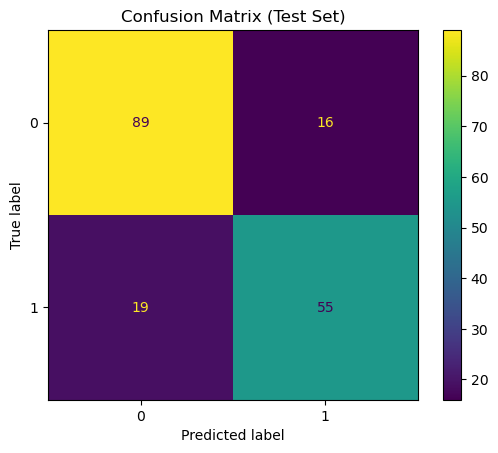

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test,model.predict(X_test))
plt.title("Confusion Matrix (Test Set)");

The confusion matrix gives as a clear indication of how many were labeled correctly in the test set. According to the plot, 89 and 55 were labeled correctly with 0 and 1, respectively. The model predicted that 19 will not survive when in fact they have survived while 16 were predicted to survive when they have died. 

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

y_probs = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)
print(f"AUC Score: {auc_score:.3f}")

AUC Score: 0.878


With **AUC Score of 0.876**, our model is performing significantly better than random guessing who will surive and who will not.

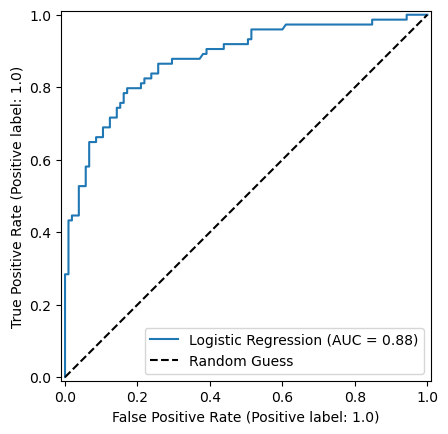

In [45]:
RocCurveDisplay.from_estimator(
    grid_search.best_estimator_, 
    X_test, 
    y_test,
    name='Logistic Regression'
)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.legend()
plt.show()

 The `ROC Curve`  demonstrates that the model is a reasonably effective classifier for predicting survival. Its ROC curve is well above the random guess line, and the AUC of 0.88 indicates a strong discriminatory power between passengers who survived and those who did not. This suggests that the features used by the model contain valuable information for predicting survival outcomes on the Titanic.

In [46]:
model.named_steps

{'scaler': StandardScaler(),
 'logreg': LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='liblinear')}

In [47]:
coefs = pd.Series(model.named_steps['logreg'].coef_[0], index=model.feature_names_in_)
coefs.iloc[np.argsort(abs(coefs))[::-1]]

is_man                    -1.215025
class_Third               -0.437702
sibsp_2OrMore             -0.275124
has_deck                   0.268141
is_woman                   0.096009
fare_(51.233, 102.466]     0.092518
parch_3OrMore             -0.072351
Cherbourg                  0.071382
Southampton               -0.064756
fare_(-0.512, 51.233]     -0.035037
age                       -0.013068
parch_0                    0.006310
sibsp_1                    0.000000
sibsp_0                    0.000000
class_Second               0.000000
parch_1                    0.000000
parch_2                    0.000000
fare_(461.096, 512.329]    0.000000
Queenstown                 0.000000
fare_(409.863, 461.096]    0.000000
is_child                   0.000000
fare_(102.466, 153.699]    0.000000
fare_(153.699, 204.932]    0.000000
fare_(204.932, 256.165]    0.000000
fare_(256.165, 307.398]    0.000000
fare_(307.398, 358.63]     0.000000
fare_(358.63, 409.863]     0.000000
class_First                0

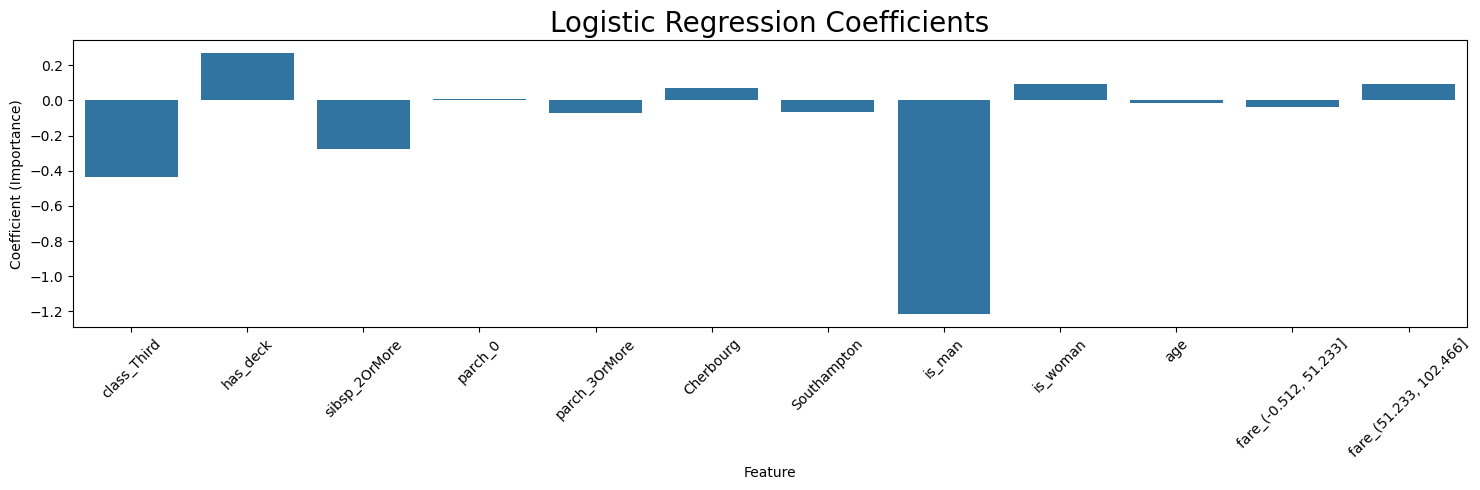

In [48]:
plt.figure(figsize=(15, 5))
sns.barplot(x=coefs[coefs!=0].index, y=coefs[coefs!=0].values)

plt.title("Logistic Regression Coefficients", size=20)
plt.xticks(rotation=45)
plt.ylabel("Coefficient (Importance)")
plt.xlabel("Feature")
plt.tight_layout();

`Logistic Regression Coefficint` plot represent the comparison between each features of the titanic dataset and their importance in the final model.

The most important by far is the `is_man` column with -1.215025 coeffcient. As it turns out being an adult male in the titanic ship makes you more likely to NOT survive the crash. This could be due to the prioritization to children and women in terms of safety. Next to `class_third` are the `class` and `sibsp_2OrMore` which have -0.437702 and -0.275124 coefficients, respectively. `class_third` make sense because the crew will prioritize those who are in the higher class. `sibsp_2OrMore` is a surpising one because as it turns out, the more siblings/spouses abourd you have, the more likely you are to die. It might not be wise to bring your spouse and parents with you in your next cruise trip.

So if you're an adult male in third class with your parents and spouse, you might not be the luckiest person there in the ship.

In conclusion, we have created pretty robust model using Logistic Regression and have identified the key metrics (and the possible reasons) to determine which demographics are more likely to die in the Titanic incident. 

### Recommendation
Although the model is pretty robust, I think the model could be improved further:

* Class imbalance - a  62:37 ratio between  non surviving and surviving class is a moderate one that doesn't require strict technique to balance the distribution, but it might be worth resampling the data and compare the results.
* Feature Engineering - we could also add other features like clustering them based on their fare and class (wheather they paid well below their class or well above their class or just right) and all that to somehow increase the predictive power of some of the features. However, since we are only using Logistic Regression (with linearity assumption), this might also just be a futile endevours.
* Modeling Technique - with that being said, we can change our modeling technique to include the non linear relationship between predictors and response. We could resort to Random Forest or even to Neural Network.